In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
dataset = pd.read_csv("dataset/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# Check for missing values
print(dataset.isnull().sum())

# Data types
print(dataset.dtypes)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [19]:
# Basic statistics
print(dataset.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [20]:
# Check for categorical columns
categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns
print('Categorical columns:', categorical_cols)

# Encode categorical columns if any
if len(categorical_cols) > 0:
    dataset = pd.get_dummies(dataset, columns=categorical_cols)
    print('Encoded dataset columns:', dataset.columns)

Categorical columns: Index([], dtype='object')


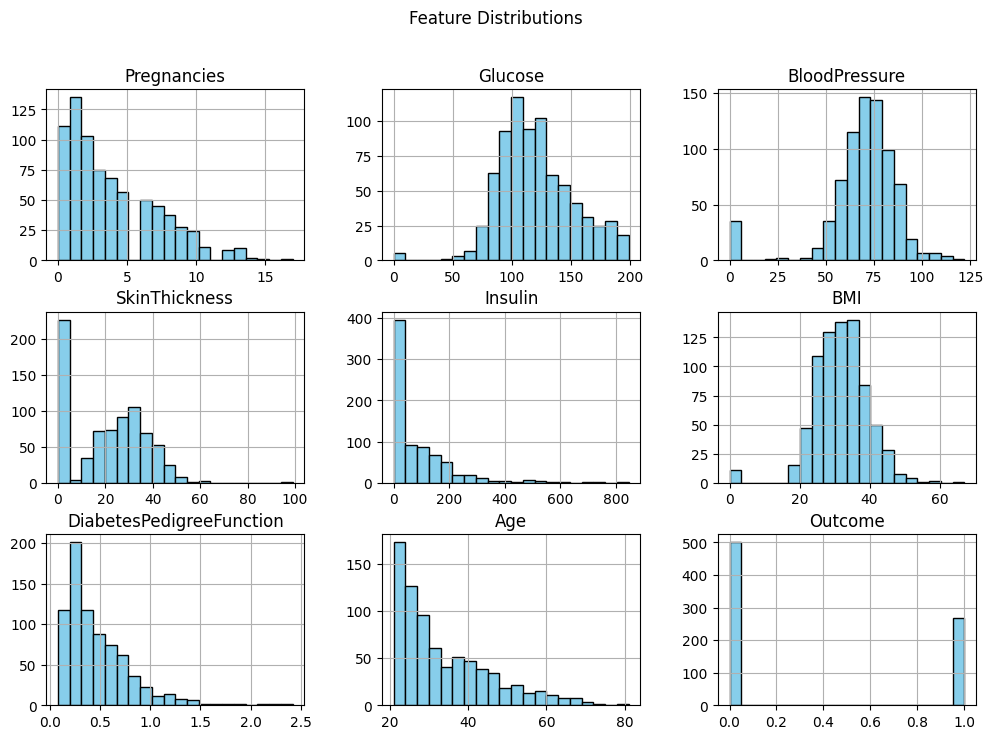

<Figure size 600x400 with 0 Axes>

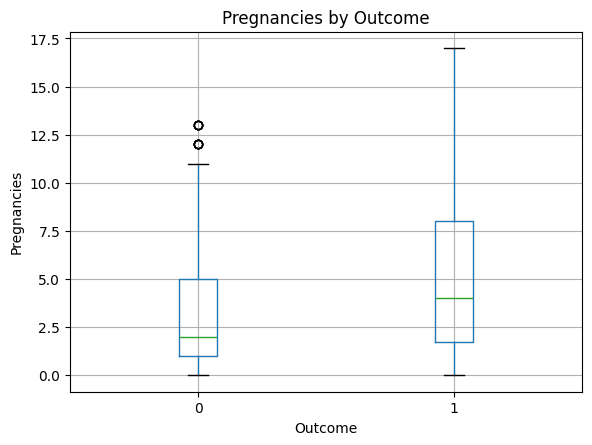

<Figure size 600x400 with 0 Axes>

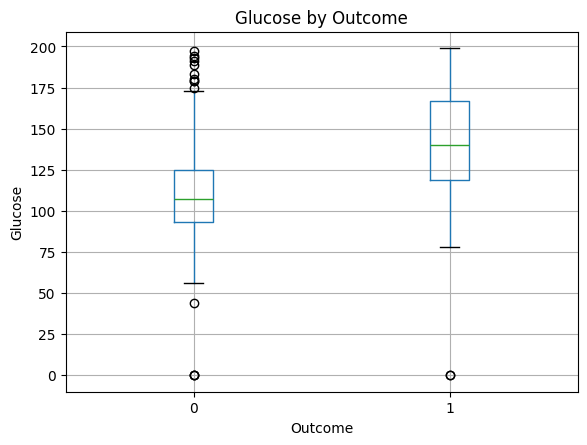

<Figure size 600x400 with 0 Axes>

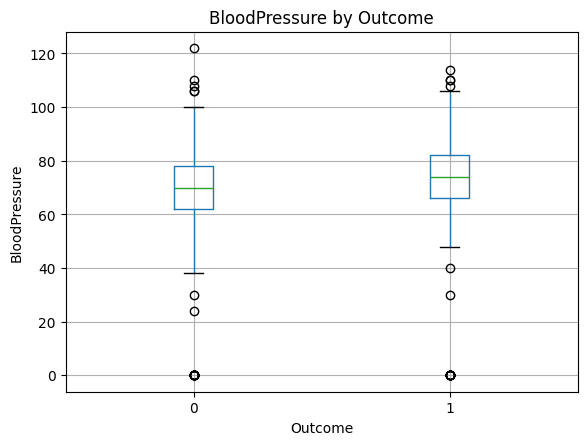

<Figure size 600x400 with 0 Axes>

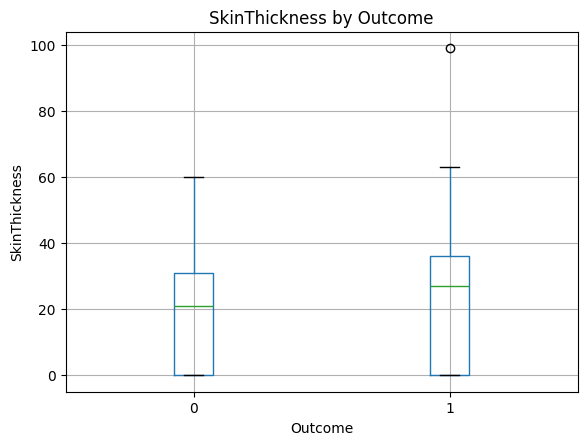

<Figure size 600x400 with 0 Axes>

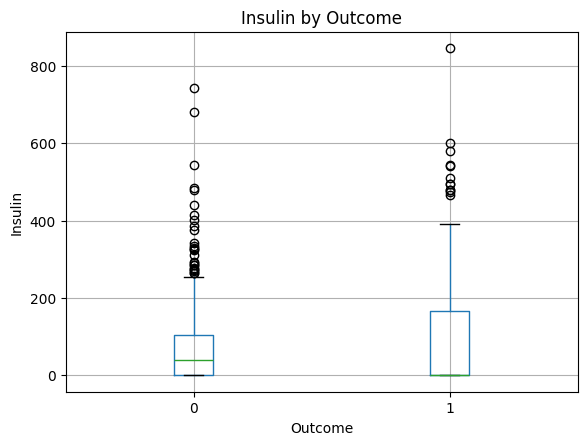

<Figure size 600x400 with 0 Axes>

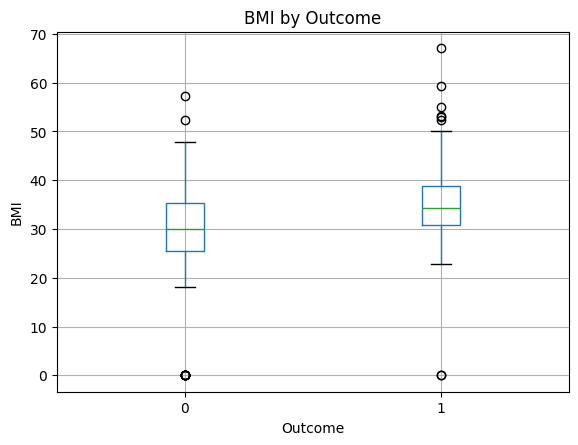

<Figure size 600x400 with 0 Axes>

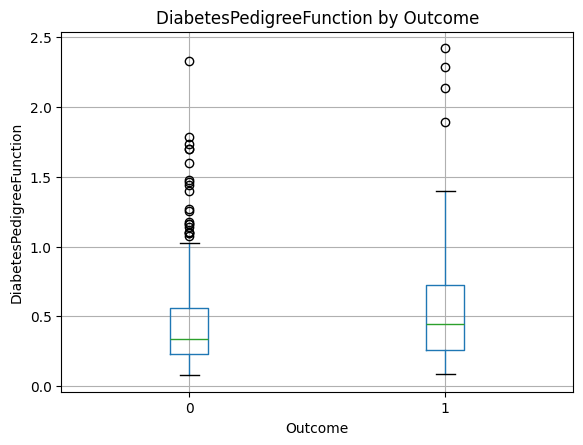

<Figure size 600x400 with 0 Axes>

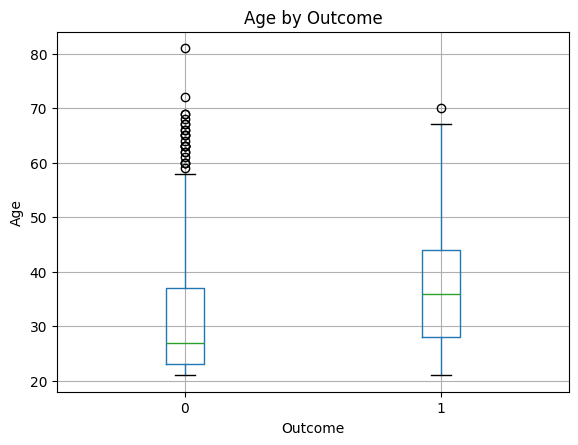

In [21]:
# Uni-variate Analysis: Plot histograms for each numeric column
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
dataset[numeric_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

# Bi-variate Analysis: Boxplots to compare features by Outcome
for col in numeric_cols:
    if col != 'Outcome':
        plt.figure(figsize=(6, 4))
        dataset.boxplot(column=col, by='Outcome')
        plt.title(f'{col} by Outcome')
        plt.suptitle('')
        plt.xlabel('Outcome')
        plt.ylabel(col)
        plt.show()